<a href="https://colab.research.google.com/github/RhysWangJunfei/lmp/blob/main/LMP_paper_infer_r_118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from scipy.io import loadmat
# pip install scipy
import numpy as np
from scipy.optimize import lsq_linear
m_list = loadmat('/content/drive/MyDrive/Postdoc/lmp/m_list118_5000.mat')['m_list']
f_list = loadmat('/content/drive/MyDrive/Postdoc/lmp/f_list118_5000.mat')['f_list']
H = loadmat('/content/drive/MyDrive/Postdoc/lmp/ptdf118.mat')['H']
branch = loadmat('/content/drive/MyDrive/Postdoc/lmp/mpc_branch_118.mat')['mpc_branch_118']

In [43]:
f_list.shape

(5000, 186)

In [48]:
A = []
b=[]

In [45]:
H.shape

(186, 118)

In [49]:
for index in range(0,118):
  Hi = H[:,index]
  mi = m_list[:,index]/2
  fh = f_list[0:,:]*Hi
  if len(A)==0:
    A = fh
    b = mi
  else:
    A = np.vstack([A,fh])
    b = np.hstack([b,mi])

In [50]:
np.asarray(b).shape

(590000,)

In [51]:
A=A/100
res = lsq_linear(A, b, bounds=(0.0, np.inf))
x = res.x
print("x (nonnegative) =", x)
print("residual norm   =", np.linalg.norm(A@x - b))

x (nonnegative) = [3.06665598e-02 1.32682522e-02 1.64103307e-03 2.40098035e-02
 1.15216685e-02 4.52294026e-03 2.23319555e-03 1.23312044e-04
 2.29180608e-03 1.99964570e-02 2.02553098e-02 5.73027022e-03
 1.88622581e-02 5.19149568e-02 8.35870316e-03 2.25579279e-02
 2.18002215e-02 8.50833899e-02 6.61411212e-02 2.02450802e-02
 1.27513517e-02 4.60963200e-02 1.18343990e-02 1.08220151e-02
 2.58840368e-02 1.31154720e-02 1.88693942e-02 2.16267159e-02
 3.47866441e-02 1.12487277e-02 1.52789317e-02 1.73569088e-04
 2.91272356e-02 1.74461666e-02 1.95963483e-02 1.13704833e-04
 2.95968463e-03 7.74613450e-03 5.02007548e-02 1.27153100e-02
 3.38047357e-02 3.10898047e-02 2.10226404e-02 3.63395821e-02
 1.02892931e-01 2.23676214e-03 1.04429928e-02 4.28093657e-02
 8.62144848e-03 2.43937620e-03 1.31030115e-09 3.20577319e-02
 5.64154424e-02 2.17855728e-03 1.95222589e-02 1.42665039e-02
 5.32079641e-02 4.41160433e-02 6.22178702e-02 4.05181266e-02
 2.26552152e-02 4.48161288e-02 4.44448575e-02 5.39902856e-02
 1.882

In [7]:
true_r = branch[:,2]
true_r[:10]

array([0.0303 , 0.0129 , 0.00176, 0.0241 , 0.0119 , 0.00459, 0.00244,
       0.     , 0.00258, 0.0209 ])

In [8]:
x[0:10]

array([0.0307734 , 0.01328837, 0.00169501, 0.02401614, 0.01148979,
       0.00448847, 0.0022315 , 0.00012814, 0.00229211, 0.0207579 ])

In [57]:
import numpy as np

def solve3_linear(A, b):
    """
    A: 3x3 (list or np.array)
    b: length-3 (list or np.array)
    returns x (length-3)
    """
    A = np.asarray(A, dtype=float)
    b = np.asarray(b, dtype=float)
    try:
        return np.linalg.solve(A, b)            # exact if A is nonsingular
    except np.linalg.LinAlgError:
        # fallback: least-squares solution if singular/ill-conditioned
        x, *_ = np.linalg.lstsq(A, b, rcond=None)
        return x

# EXAMPLE
x = solve3_linear(A, b)
print("r =", x)   # array([r1, r2, r3])

r = [ 3.06613564e-02  1.32639728e-02  1.64395639e-03  2.40156204e-02
  1.15248763e-02  4.52688664e-03  2.23359574e-03  1.23607208e-04
  2.29180608e-03  2.00390386e-02  2.02250782e-02  5.73047288e-03
  1.88572326e-02  5.18341637e-02  8.37513942e-03  2.25547654e-02
  2.18157706e-02  8.52607740e-02  6.63599980e-02  2.02779573e-02
  1.27541906e-02  4.60072530e-02  1.18436038e-02  1.08687115e-02
  2.58838237e-02  1.31582966e-02  1.88527800e-02  2.16193458e-02
  3.47677893e-02  1.11861841e-02  1.52530949e-02  1.59442323e-04
  2.91570268e-02  1.74431269e-02  1.95902934e-02  1.17167527e-04
  2.95138623e-03  7.76102958e-03  5.02903579e-02  1.27105122e-02
  3.37449399e-02  3.10703168e-02  2.11615335e-02  3.64489858e-02
  1.04202070e-01  2.20024395e-03  1.05620975e-02  4.28681758e-02
  8.63200995e-03  2.43375021e-03 -2.36873482e-05  3.21950912e-02
  5.56141471e-02  2.15517495e-03  1.98345856e-02  1.41598120e-02
  5.46077856e-02  4.44378592e-02  6.32179356e-02  4.05225701e-02
  2.27450407e-02  4.4

In [10]:
np.argmax(r)

np.int64(105)

In [11]:
true_r = branch[:,2]

In [12]:
x[:10]

array([0.0307734 , 0.01328837, 0.00169501, 0.02401614, 0.01148979,
       0.00448847, 0.0022315 , 0.00012814, 0.00229211, 0.0207579 ])

In [13]:
true_r[:10]

array([0.0303 , 0.0129 , 0.00176, 0.0241 , 0.0119 , 0.00459, 0.00244,
       0.     , 0.00258, 0.0209 ])

In [14]:
per=abs(x[np.where(true_r>0)]-true_r[np.where(true_r>0)])/true_r[np.where(true_r>0)]

In [15]:
x.shape

(186,)

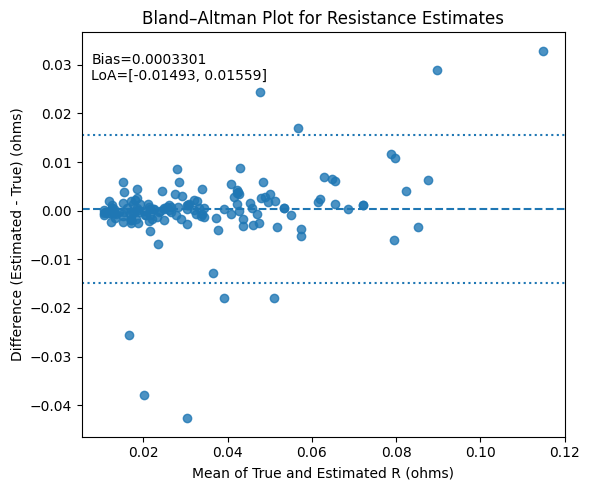

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# inputs: arrays of true and estimated resistances, same length
R_true = true_r[np.where(true_r>0.01)]
R_hat  = x[np.where(true_r>0.01)]
mean_R = (R_hat + R_true) / 2.0
diff_R = (R_hat - R_true)             # use this for absolute (ohms) Bland–Altman
# diff_R = 100 * (R_hat - R_true) / ((R_hat + R_true)/2)  # <- use this for % Bland–Altman

bias = diff_R.mean()
sd   = diff_R.std(ddof=1)
loa_upper = bias + 1.96 * sd
loa_lower = bias - 1.96 * sd

plt.figure(figsize=(6,5))
plt.scatter(mean_R, diff_R, alpha=0.8)
plt.axhline(bias, linestyle="--")
plt.axhline(loa_upper, linestyle=":")
plt.axhline(loa_lower, linestyle=":")
plt.xlabel("Mean of True and Estimated R (ohms)")
plt.ylabel("Difference (Estimated - True) (ohms)")
plt.title("Bland–Altman Plot for Resistance Estimates")
plt.text(0.02, 0.95, f"Bias={bias:.4g}\nLoA=[{loa_lower:.4g}, {loa_upper:.4g}]",
         transform=plt.gca().transAxes, ha="left", va="top")
plt.tight_layout()
plt.show()


In [60]:
import numpy as np

def mape_rmse(x_true, x_hat, B=2000, seed=0):
    x_true = np.asarray(x_true, float); x_hat = np.asarray(x_hat, float)
    e = x_hat - x_true
    # point estimates
    rmse = np.sqrt(np.mean(e**2))
    z = np.abs(e) / np.abs(x_true)
    mape = 100 * np.mean(z)

    n = len(x_true)

    # analytic CIs
    sz = z.std(ddof=1); sy = (e**2).std(ddof=1); ybar = (e**2).mean()
    mape_ci_ana = (mape - 1.96*100*sz/np.sqrt(n), mape + 1.96*100*sz/np.sqrt(n))
    rmse_ci_ana = (np.sqrt(ybar) - 1.96*np.sqrt(sy**2/(4*n*ybar)),
                   np.sqrt(ybar) + 1.96*np.sqrt(sy**2/(4*n*ybar)))

    # bootstrap CIs
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    boots_mape, boots_rmse = [], []
    for _ in range(B):
        b = rng.choice(idx, size=n, replace=True)
        e_b = (x_hat[b] - x_true[b])
        boots_rmse.append(np.sqrt(np.mean(e_b**2)))
        boots_mape.append(100*np.mean(np.abs(e_b)/np.abs(x_true[b])))
    mape_ci_boot = (np.percentile(boots_mape, 2.5), np.percentile(boots_mape, 97.5))
    rmse_ci_boot = (np.percentile(boots_rmse, 2.5), np.percentile(boots_rmse, 97.5))

    return dict(
        MAPE=mape, MAPE_CI_analytic=mape_ci_ana, MAPE_CI_boot=mape_ci_boot,
        RMSE=rmse, RMSE_CI_analytic=rmse_ci_ana, RMSE_CI_boot=rmse_ci_boot
    )


In [61]:
mape_rmse(R_true,R_hat)

{'MAPE': np.float64(10.326795606915502),
 'MAPE_CI_analytic': (np.float64(7.853411182198052),
  np.float64(12.800180031632951)),
 'MAPE_CI_boot': (np.float64(8.10663776407509),
  np.float64(12.819159523535061)),
 'RMSE': np.float64(0.007763753128929335),
 'RMSE_CI_analytic': (np.float64(0.0053222907962084),
  np.float64(0.01020521546165027)),
 'RMSE_CI_boot': (np.float64(0.005240429073071511),
  np.float64(0.010061282298075843))}

In [63]:
0.0077637-0.005322

0.0024416999999999998

LoA (multiplicative): ×0.653 to ×1.493  (≈ -34.7% to 49.3%)


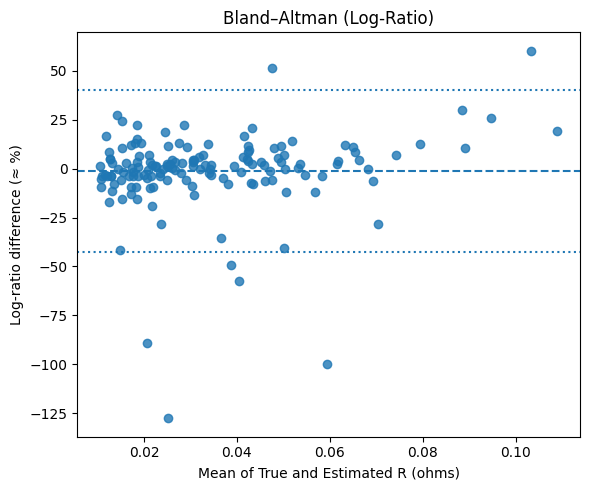

In [35]:
log_ratio = np.log(R_hat) - np.log(R_true)   # = log(R̂/R)
mu, sigma = log_ratio.mean(), log_ratio.std(ddof=1)

# Plot in percent on the log scale (approx same as % diff for small errors)
y = 100 * log_ratio
bias_pct = 100 * mu
upper_pct = 100 * (mu + 1.96*sigma)
lower_pct = 100 * (mu - 1.96*sigma)

x2 = ((R_hat + R_true)/2.0)                   # you may also use np.log(x) for aesthetics

plt.figure(figsize=(6,5))
plt.scatter(x2, y, alpha=0.8)
plt.axhline(bias_pct, linestyle="--"); plt.axhline(upper_pct, linestyle=":"); plt.axhline(lower_pct, linestyle=":")
plt.xlabel("Mean of True and Estimated R (ohms)")  # consider log x-axis
plt.ylabel("Log-ratio difference (≈ %)")
plt.title("Bland–Altman (Log-Ratio)")
# Also report multiplicative LoA (back-transformed):
lo_mult = np.exp(mu - 1.96*sigma); hi_mult = np.exp(mu + 1.96*sigma)
print(f"LoA (multiplicative): ×{lo_mult:.3f} to ×{hi_mult:.3f}  "
      f"(≈ {100*(lo_mult-1):.1f}% to {100*(hi_mult-1):.1f}%)")
plt.tight_layout(); plt.show()


In [20]:
true_r

array([0.0303 , 0.0129 , 0.00176, 0.0241 , 0.0119 , 0.00459, 0.00244,
       0.     , 0.00258, 0.0209 , 0.0203 , 0.00595, 0.0187 , 0.0484 ,
       0.00862, 0.02225, 0.0215 , 0.0744 , 0.0595 , 0.0212 , 0.0132 ,
       0.0454 , 0.0123 , 0.01119, 0.0252 , 0.012  , 0.0183 , 0.0209 ,
       0.0342 , 0.0135 , 0.0156 , 0.     , 0.0318 , 0.01913, 0.0237 ,
       0.     , 0.00431, 0.00799, 0.0474 , 0.0108 , 0.0317 , 0.0298 ,
       0.0229 , 0.038  , 0.0752 , 0.00224, 0.011  , 0.0415 , 0.00871,
       0.00256, 0.     , 0.0321 , 0.0593 , 0.00464, 0.0184 , 0.0145 ,
       0.0555 , 0.041  , 0.0608 , 0.0413 , 0.0224 , 0.04   , 0.038  ,
       0.0601 , 0.0191 , 0.0715 , 0.0715 , 0.0684 , 0.0179 , 0.0267 ,
       0.0486 , 0.0203 , 0.0405 , 0.0263 , 0.073  , 0.0869 , 0.0169 ,
       0.00275, 0.00488, 0.0343 , 0.0474 , 0.0343 , 0.0255 , 0.0503 ,
       0.0825 , 0.0803 , 0.04739, 0.0317 , 0.0328 , 0.00264, 0.0123 ,
       0.00824, 0.     , 0.00172, 0.     , 0.00901, 0.00269, 0.018  ,
       0.018  , 0.04

In [25]:
x[15*7]

np.float64(0.11923719170961404)

In [23]:
x

array([3.07733997e-02, 1.32883657e-02, 1.69501319e-03, 2.40161441e-02,
       1.14897884e-02, 4.48847222e-03, 2.23149798e-03, 1.28135125e-04,
       2.29210514e-03, 2.07579028e-02, 1.96898245e-02, 5.82392385e-03,
       1.88252795e-02, 5.18139685e-02, 8.24459468e-03, 2.25869275e-02,
       2.18622323e-02, 8.44253722e-02, 6.71432072e-02, 2.02390021e-02,
       1.27275235e-02, 4.61777378e-02, 1.18363864e-02, 1.07861584e-02,
       2.58601578e-02, 1.30319275e-02, 1.88913992e-02, 2.16441093e-02,
       3.48326509e-02, 1.13561463e-02, 1.53134124e-02, 1.91855951e-04,
       2.90844894e-02, 1.74377981e-02, 1.95734089e-02, 9.72435789e-05,
       2.94755101e-03, 7.72573092e-03, 5.01120088e-02, 1.27477043e-02,
       3.39140174e-02, 3.11668497e-02, 2.08036216e-02, 3.61733170e-02,
       1.01714956e-01, 2.28897384e-03, 1.04375491e-02, 4.31241457e-02,
       8.63500451e-03, 2.45170800e-03, 5.79065432e-06, 3.20892337e-02,
       5.71121630e-02, 2.22291224e-03, 1.96451092e-02, 1.44793362e-02,
      

In [ ]:
from numpy import inf
x[x == -inf] = 0

np.nan_to_num(per)

In [18]:
np.mean(per)

np.float64(0.13058476730489985)

In [ ]:
np.mean(abs(x-true_r))

In [ ]:
(51.307/100)**2*0.065+(45.8544/100)**2*0.025+(13.2402/100)**2*0.042

In [ ]:
dc_pf=A

In [ ]:
np.mean(abs(np.matmul(x,true_r)-power_loss)/power_loss)

In [ ]:
(0.042/(0.042**2+0.9**2))*0.9**2

0.04190873209454965